In [2]:
import os
os.chdir("C:\\Users\\pc\\CancerSubtypesAI")
print(os.getcwd())

C:\Users\pc\CancerSubtypesAI


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from utils.utils import(
    setup_environment,
    load_logger,
    load_full_feature_data
)

In [5]:
setup_environment()
logger = load_logger()

# 데이터 로드

In [19]:
train_df = pd.read_csv('data/train.csv')
train_df

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,TRAIN_6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [6]:
seq_train = load_full_feature_data()
seq_test = load_full_feature_data(train=False)

In [7]:
mutation_df = pd.concat([seq_train, seq_test]).drop_duplicates(subset=['gene', 'mutation_str'])
mutation_df.reset_index(drop=True, inplace=True)
len(mutation_df)

363089

In [8]:
mutation_df[:5]

,gene,mutation_str,type,origin,position,mutant,mut_num,hydrophobicity_min,hydrophobicity_max,hydrophobicity_mean,...,pI_std,charge_min,charge_max,charge_mean,charge_std,status,isoform_id,wt_seq,mut_seq,status_prot
0,A2M,WT,WT,[],[],[],0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,0,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,0
1,A2M,R895R,Silent_Missense,[R],[895],[R],1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,0
2,A2M,E1462K,Missense,[E],[1462],[K],1,-0.4,-0.4,-0.4,...,0.0,2.0,2.0,2.0,0.0,0,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,0
3,A2M,K289T,Missense,[K],[289],[T],1,3.2,3.2,3.2,...,0.0,-1.0,-1.0,-1.0,0.0,0,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,0
4,A2M,I175F,Missense,[I],[175],[F],1,-1.7,-1.7,-1.7,...,0.0,0.0,0.0,0.0,0.0,0,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,0


In [52]:
mutation_df.columns

Index(['gene', 'mutation_str', 'type', 'origin', 'position', 'mutant',
       'mut_num', 'hydrophobicity_min', 'hydrophobicity_max',
       'hydrophobicity_mean', 'hydrophobicity_std', 'polarity_min',
       'polarity_max', 'polarity_mean', 'polarity_std', 'mw_min', 'mw_max',
       'mw_mean', 'mw_std', 'pI_min', 'pI_max', 'pI_mean', 'pI_std',
       'charge_min', 'charge_max', 'charge_mean', 'charge_std', 'status',
       'isoform_id', 'wt_seq', 'mut_seq', 'status_prot'],
      dtype='object')

In [53]:
wt_seq_df = mutation_df.loc[(mutation_df.mutation_str == 'WT'),['gene', 'mutation_str', 'type','isoform_id', 'wt_seq']]
wt_seq_df.columns = ['gene', 'mutation_str', 'type','isoform_id', 'seq']
mut_seq_df = mutation_df.loc[(mutation_df.mutation_str != 'WT'),['gene', 'mutation_str', 'type', 'isoform_id', 'mut_seq']]
mut_seq_df.columns = ['gene', 'mutation_str', 'type','isoform_id', 'seq']

In [54]:
wt_seq_df[:10]

,gene,mutation_str,type,isoform_id,seq
0,A2M,WT,WT,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...
141,AAAS,WT,WT,Q9NRG9,MCSLGLFPPPPPRGQVTLYEHNNELVTGSSYESPPPDFRGQWINLP...
184,AADAT,WT,WT,Q8N5Z0,MNYARFITAASAARNPSPIRTMTDILSRGPKSMISLAGGLPNPNMF...
209,AARS1,WT,WT,H3BPK7,MDSTLTASEIRQRFIDFFKRNEHTYVHSSATIPLDDPTLLFANAGM...
210,ABAT,WT,WT,H3BNQ7,MASMLLAQRLACSFQHSYRLLVPGSRHISQAAAKVDVEFDYDGPLM...
258,ABCA1,WT,WT,A0A7I2V5U0,MACWPQLRLLLWKNLTFRRRQTCQLLLEVAWPLFIFLILISVRLSY...
403,ABCA2,WT,WT,A0A087WXK5,MGRKTSRVQQGPPRSPACSAHGERSWGLEFPPFRWLLGIAGRTHLA...
522,ABCA3,WT,WT,Q4LE27,TAPPPSPSLPLQDRAATSAHLALFTLSFQSTFLLFPAGCSAYLNLL...
651,ABCA4,WT,WT,P78363,MGFVRQIQLLLWKNWTLRKRQKIRFVVELVWPLSLFLVLIWLRNAN...
845,ABCA5,WT,WT,Q8WWZ7,MSTAIREVGVWRQTRTLLLKNYLIKCRTKKSSVQEILFPLFFLFWL...


In [55]:
mut_seq_df[:10]

,gene,mutation_str,type,isoform_id,seq
1,A2M,R895R,Silent_Missense,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...
2,A2M,E1462K,Missense,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...
3,A2M,K289T,Missense,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...
4,A2M,I175F,Missense,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...
5,A2M,D533D,Silent_Missense,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...
6,A2M,L903L,Silent_Missense,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...
7,A2M,S660R,Missense,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...
8,A2M,P799S,Missense,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...
9,A2M,L621P,Missense,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...
10,A2M,M713I,Missense,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...


In [56]:
seq_df = pd.concat([wt_seq_df, mut_seq_df])
seq_df

,gene,mutation_str,type,isoform_id,seq
0,A2M,WT,WT,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...
141,AAAS,WT,WT,Q9NRG9,MCSLGLFPPPPPRGQVTLYEHNNELVTGSSYESPPPDFRGQWINLP...
184,AADAT,WT,WT,Q8N5Z0,MNYARFITAASAARNPSPIRTMTDILSRGPKSMISLAGGLPNPNMF...
209,AARS1,WT,WT,H3BPK7,MDSTLTASEIRQRFIDFFKRNEHTYVHSSATIPLDDPTLLFANAGM...
210,ABAT,WT,WT,H3BNQ7,MASMLLAQRLACSFQHSYRLLVPGSRHISQAAAKVDVEFDYDGPLM...
...,...,...,...,...,...
363084,ZYX,L561I,Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...
363085,ZYX,E147X,Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...
363086,ZYX,P268P P299P,Silent_Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...
363087,ZYX,W200L,Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...


# 데이터 확인

In [57]:
seq_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 363089 entries, 0 to 363088
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   gene          363089 non-null  object
 1   mutation_str  363064 non-null  object
 2   type          363089 non-null  object
 3   isoform_id    363080 non-null  object
 4   seq           363080 non-null  object
dtypes: object(5)
memory usage: 16.6+ MB


In [58]:
seq_df[seq_df.mutation_str.isna()]

,gene,mutation_str,type,isoform_id,seq
214604,AK2,NaN,Unknown,P54819,MAPSVPAAEPEYPKGIRAVLLGPPGAGKGTQAPRLAENFCVCHLAT...
222177,ATP6V1H,NaN,Unknown,Q9UI12,MTKMDIRGAVDAAVPTNIIAAKAAEVRANKVNWQSYLQGQMISAED...
230236,CCRL2,NaN,Unknown,O00421,MANYTLAPEDEYDVLIEGELESDEAEQCDKYDAQALSAQLVPSLCS...
235002,CFP,NaN,Unknown,P27918,MITEGAQAPRLLLPPLLLLLTLPATGSDPVLCFTQYEESSGKCKGL...
237735,CNOT2,NaN,Unknown,Q9NZN8,MVRTDGHTLSEKRNYQVTNSMFGASRKKFVEGVDSDYHDENMYYSQ...
241796,CRAT,NaN,Unknown,P43155,MLAFAARTVVKPLGFLKPFSLMKASSRFKAHQDALPRLPVPPLQQS...
250001,DPYSL4,NaN,Unknown,O14531,MSFQGKKSIPRITSDRLLIRGGRIVNDDQSFYADVHVEDGLIKQIG...
267398,GUK1,NaN,Unknown,B1ANG9,MLRRPLAGLAAAALGRAPPDGMSGPRPVVLSGPSGAGKSTLLKRLL...
273090,IER3,NaN,Unknown,P46695,MCHSRSCHPTMTILQAPTPAPSTIPGPRRGSGPEIFTFDPLPEPAA...
276048,INHBB,NaN,Unknown,P09529,MDGLPGRALGAACLLLLAAGWLGPEAWGSPTPPPTPAAPPPPPPPG...


In [59]:
seq_df[seq_df.isoform_id.isna()]

,gene,mutation_str,type,isoform_id,seq
81013,HBBP1,WT,WT,NaN,NaN
156234,PVT1,WT,WT,NaN,NaN
204489,XIST,WT,WT,NaN,NaN
208002,ABCA9,M1fs,Frameshift,NaN,NaN
225850,BTG3,M1Nfs,Frameshift,NaN,NaN
285278,LCP1,M1Wfs,Frameshift,NaN,NaN
347748,TCHH,M1Nfs,Frameshift,NaN,NaN
347754,TCHH,M1Cfs,Frameshift,NaN,NaN
357664,UQCRB,M1Nfs,Frameshift,NaN,NaN


In [60]:
seq_df['seq_len'] = seq_df.seq.apply(lambda x: len(x) if isinstance(x, str) else None)

In [61]:
seq_df.seq_len.describe()

count    363080.000000
mean       1044.776983
std        1190.041087
min           1.000000
25%         432.000000
50%         715.000000
75%        1231.000000
max       35991.000000
Name: seq_len, dtype: float64

In [62]:
seq_df[seq_df.seq_len == 2]

,gene,mutation_str,type,isoform_id,seq,seq_len
34291,CDKN1A,E3fs,Frameshift,P38936,MS,2.0
90267,IL2RA,S3*,Nonsense,P01589,MD,2.0
148667,POP7,E3fs,Frameshift,O75817,MA,2.0
183894,SUN2,E125K R3*,Complex_mutation,Q9UH99,MS,2.0
219189,ARF1,N3Efs,Frameshift,P84077,MG,2.0
222987,AXIN2,S3Dfs,Frameshift,Q9Y2T1,MS,2.0
275175,IL27RA,G3Efs,Frameshift,Q6UWB1,MR,2.0


In [47]:
seq_len = 3
term_len = round(0.2 * seq_len)
term_len

1

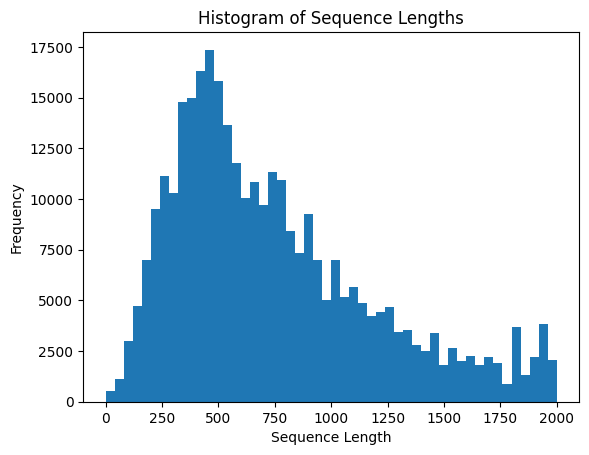

In [38]:
plt.hist(seq_df.seq_len, range=(0, 2000), bins=50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sequence Lengths')
plt.show()

# SAAC

In [82]:
aa_codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 
               'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'fs']

# 새로운 열을 미리 생성
for region in ['n_term', 'mid', 'c_term']:
    for code in aa_codes:
        seq_df[f'{region}_{code}'] = 0

for index, row in seq_df.iterrows():
    seq = row['seq']
    # 문자열인지 확인
    if isinstance(seq, str):
        seq_len = len(seq)
        mut_str = row['mutation_str']
        # 길이가 3보다 작으면 모두 C-term에 포함
        if seq_len < 3:
            n_term_seq = list(seq)
            mid_seq = []
            c_term_seq = []

        # fs 변이인 경우
        if isinstance(mut_str, str) and 'fs' in mut_str:
            term_len = round(0.2 * seq_len)
            seq_list = list(seq)
            n_term_seq = seq_list[:term_len+1]
            mid_seq = seq_list[term_len]
            c_term_seq = seq_list[-term_len:] + ['fs']

        # fs 아닌 경우
        else:
            term_len = round(0.2 * seq_len)
            seq_list = list(seq)
            n_term_seq = seq_list[:term_len+1]
            mid_seq = seq_list[term_len]
            c_term_seq = seq_list[-term_len:] 

        # n_term, mid, c_term 아미노산 빈도 계산
        for code in aa_codes:
            seq_df.at[index, f'n_term_{code}'] = n_term_seq.count(code)
            seq_df.at[index, f'mid_{code}'] = mid_seq.count(code)
            seq_df.at[index, f'c_term_{code}'] = c_term_seq.count(code)

    # 문자열이 아닌 경우 모든 빈도 0
    else:
        for region in ['n_term', 'mid', 'c_term']:
            for code in aa_codes:
                seq_df.at[index, f'{region}_{code}'] = 0

In [84]:
seq_df

,gene,mutation_str,type,isoform_id,seq,seq_len,n_term_A,n_term_C,n_term_D,n_term_E,...,c_term_N,c_term_P,c_term_Q,c_term_R,c_term_S,c_term_T,c_term_V,c_term_W,c_term_Y,c_term_fs
0,A2M,WT,WT,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,1474.0,8,6,10,23,...,12,18,18,7,30,24,27,2,13,0
141,AAAS,WT,WT,Q9NRG9,MCSLGLFPPPPPRGQVTLYEHNNELVTGSSYESPPPDFRGQWINLP...,546.0,3,2,4,9,...,2,19,5,3,9,5,5,2,1,0
184,AADAT,WT,WT,Q8N5Z0,MNYARFITAASAARNPSPIRTMTDILSRGPKSMISLAGGLPNPNMF...,425.0,9,0,1,4,...,2,5,3,1,8,1,8,2,2,0
209,AARS1,WT,WT,H3BPK7,MDSTLTASEIRQRFIDFFKRNEHTYVHSSATIPLDDPTLLFANAGM...,999.0,15,5,18,12,...,8,12,14,8,14,9,13,3,0,0
210,ABAT,WT,WT,H3BNQ7,MASMLLAQRLACSFQHSYRLLVPGSRHISQAAAKVDVEFDYDGPLM...,515.0,8,2,6,6,...,3,7,3,8,13,9,8,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363084,ZYX,L561I,Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...,581.0,11,2,5,7,...,3,10,3,8,4,6,9,0,4,0
363085,ZYX,E147X,Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...,581.0,11,2,5,7,...,3,10,3,8,4,6,9,0,4,0
363086,ZYX,P268P P299P,Silent_Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...,581.0,11,2,5,7,...,3,10,3,8,4,6,9,0,4,0
363087,ZYX,W200L,Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...,581.0,11,2,5,7,...,3,10,3,8,4,6,9,0,4,0


In [6]:
seq_df.to_csv('data/processed/saac_seq.csv', index=False)

In [9]:
seq_df = pd.read_csv('data/processed/saac_seq.csv')

In [8]:
seq_df

,gene,mutation_str,type,isoform_id,seq,seq_len,n_term_A,n_term_C,n_term_D,n_term_E,...,c_term_N,c_term_P,c_term_Q,c_term_R,c_term_S,c_term_T,c_term_V,c_term_W,c_term_Y,c_term_fs
0,A2M,WT,WT,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,1474.0,8,6,10,23,...,12,18,18,7,30,24,27,2,13,0
1,AAAS,WT,WT,Q9NRG9,MCSLGLFPPPPPRGQVTLYEHNNELVTGSSYESPPPDFRGQWINLP...,546.0,3,2,4,9,...,2,19,5,3,9,5,5,2,1,0
2,AADAT,WT,WT,Q8N5Z0,MNYARFITAASAARNPSPIRTMTDILSRGPKSMISLAGGLPNPNMF...,425.0,9,0,1,4,...,2,5,3,1,8,1,8,2,2,0
3,AARS1,WT,WT,H3BPK7,MDSTLTASEIRQRFIDFFKRNEHTYVHSSATIPLDDPTLLFANAGM...,999.0,15,5,18,12,...,8,12,14,8,14,9,13,3,0,0
4,ABAT,WT,WT,H3BNQ7,MASMLLAQRLACSFQHSYRLLVPGSRHISQAAAKVDVEFDYDGPLM...,515.0,8,2,6,6,...,3,7,3,8,13,9,8,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363084,ZYX,L561I,Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...,581.0,11,2,5,7,...,3,10,3,8,4,6,9,0,4,0
363085,ZYX,E147X,Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...,581.0,11,2,5,7,...,3,10,3,8,4,6,9,0,4,0
363086,ZYX,P268P P299P,Silent_Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...,581.0,11,2,5,7,...,3,10,3,8,4,6,9,0,4,0
363087,ZYX,W200L,Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...,581.0,11,2,5,7,...,3,10,3,8,4,6,9,0,4,0


# SUBCLASS 별 고빈도 유전자 선택

In [10]:
subclass_count = train_df.SUBCLASS.value_counts()

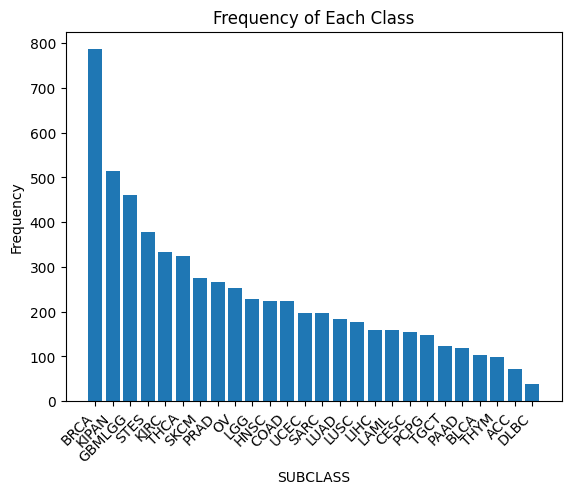

In [12]:
plt.bar(subclass_count.index, subclass_count.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('SUBCLASS')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class')
plt.show()

In [13]:
subclass_count

SUBCLASS
BRCA      786
KIPAN     515
GBMLGG    461
STES      379
KIRC      334
THCA      324
SKCM      276
PRAD      266
OV        253
LGG       229
HNSC      223
COAD      223
UCEC      198
SARC      198
LUAD      184
LUSC      178
LIHC      158
LAML      158
CESC      155
PCPG      147
TGCT      124
PAAD      120
BLCA      104
THYM       98
ACC        72
DLBC       38
Name: count, dtype: int64

In [11]:
# 레이블인코딩 (WT == 0, MUT == 1)
train_val = train_df.values
train_val[:, 2:] = np.where(train_val[:, 2:]=='WT', 0, 1)
train_val

array([['TRAIN_0000', 'KIPAN', 0, ..., 0, 0, 0],
       ['TRAIN_0001', 'SARC', 0, ..., 0, 0, 0],
       ['TRAIN_0002', 'SKCM', 1, ..., 0, 0, 0],
       ...,
       ['TRAIN_6198', 'COAD', 0, ..., 0, 1, 0],
       ['TRAIN_6199', 'TGCT', 0, ..., 0, 0, 0],
       ['TRAIN_6200', 'SKCM', 0, ..., 0, 0, 0]], dtype=object)

In [12]:
train_label = pd.DataFrame(train_val, columns=train_df.columns)
train_label[:3]

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TRAIN_0001,SARC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,TRAIN_0002,SKCM,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
subclass_count = train_label.drop('ID', axis=1).groupby('SUBCLASS').sum().T
subclass_count

SUBCLASS,ACC,BLCA,BRCA,CESC,COAD,DLBC,GBMLGG,HNSC,KIPAN,KIRC,...,PAAD,PCPG,PRAD,SARC,SKCM,STES,TGCT,THCA,THYM,UCEC
A2M,0,9,7,3,11,2,3,6,5,3,...,1,1,0,4,31,21,2,0,0,15
AAAS,0,0,2,3,3,0,1,4,2,2,...,1,0,1,0,5,10,1,0,0,5
AADAT,0,1,2,2,1,0,0,0,1,0,...,0,0,0,0,5,5,0,0,0,5
AARS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ABAT,0,0,8,0,5,0,1,4,0,0,...,1,0,0,0,11,3,0,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNRF4,1,0,3,3,3,0,0,6,1,0,...,3,0,1,2,13,15,1,0,0,2
ZPBP,1,2,2,1,3,0,4,1,1,1,...,0,0,0,0,8,10,0,2,0,9
ZW10,1,2,3,4,3,0,4,4,2,1,...,1,0,0,1,4,10,0,2,0,7
ZWINT,0,1,3,2,4,2,0,1,1,1,...,1,0,0,0,1,9,0,0,0,3


In [14]:
(subclass_count.sum())

SUBCLASS
ACC        2839
BLCA       7331
BRCA      13706
CESC       6840
COAD      16306
DLBC       2562
GBMLGG     5779
HNSC       9047
KIPAN      8262
KIRC       4452
LAML        483
LGG        1990
LIHC       4951
LUAD      10680
LUSC      12376
OV         3692
PAAD       4354
PCPG        651
PRAD       2049
SARC       2541
SKCM      36579
STES      31018
TGCT       2073
THCA       1377
THYM        429
UCEC      26526
dtype: object

In [15]:
subclasses = subclass_count.columns
subclasses

Index(['ACC', 'BLCA', 'BRCA', 'CESC', 'COAD', 'DLBC', 'GBMLGG', 'HNSC',
       'KIPAN', 'KIRC', 'LAML', 'LGG', 'LIHC', 'LUAD', 'LUSC', 'OV', 'PAAD',
       'PCPG', 'PRAD', 'SARC', 'SKCM', 'STES', 'TGCT', 'THCA', 'THYM', 'UCEC'],
      dtype='object', name='SUBCLASS')

In [16]:
high_freq_genes = []
for sub in subclasses:
    # sub_count = subclass_count.sum()[sub]
    gene_freq = subclass_count[sub].sort_values(ascending=False).head(10)
    high_freq_genes.extend(gene_freq.index)
high_freq_genes = list(set(high_freq_genes))

In [17]:
high_freq_genes

['NLRP3',
 'APC',
 'PTPRD',
 'IDH2',
 'SOWAHC',
 'VHL',
 'CACNA1B',
 'MEFV',
 'AXL',
 'RET',
 'MAP3K1',
 'RYR1',
 'CTNNB1',
 'DMD',
 'HMGB3',
 'NOTCH1',
 'PKHD1',
 'RELN',
 'PEG3',
 'CMPK2',
 'PIM1',
 'CEBPA',
 'LAMA1',
 'HLA-C',
 'AMOT',
 'LRIG1',
 'PEX6',
 'PTGIR',
 'NOTCH2',
 'MFHAS1',
 'EGFR',
 'TM7SF2',
 'GNAS',
 'PTPN11',
 'STAB1',
 'SCN10A',
 'COL12A1',
 'SPOP',
 'BRCA1',
 'RB1',
 'PABPC1',
 'MYH2',
 'TG',
 'COL11A1',
 'NCOA6',
 'PDE4DIP',
 'COL6A3',
 'GATA3',
 'ATRX',
 'CHEK2',
 'MYH1',
 'DLC1',
 'CDKN2A',
 'MYH4',
 'COL5A3',
 'PCLO',
 'IDH1',
 'PRKDC',
 'COL5A2',
 'NPM1',
 'CDC27',
 'DST',
 'PLXNB2',
 'HRAS',
 'CTCF',
 'PLEC',
 'TNFAIP3',
 'SMC1A',
 'FGFR3',
 'AHNAK',
 'NCOR2',
 'RYR2',
 'SYNE1',
 'MXRA5',
 'KMT2D',
 'SLC12A4',
 'ERCC2',
 'SPTAN1',
 'BMP2K',
 'BTG1',
 'CDH8',
 'LAMA2',
 'VWF',
 'ZBTB10',
 'PIK3CA',
 'DOCK2',
 'KIT',
 'NFKB2',
 'MTOR',
 'ALMS1',
 'CDH1',
 'CELSR1',
 'FBN2',
 'TP53',
 'BTG2',
 'MET',
 'BRAF',
 'FBXW7',
 'PTEN',
 'SPTA1',
 'RUNX1',
 'IRF4',
 'SMC

In [20]:
len(high_freq_genes)

107

In [19]:
file_path = 'data/processed/saac/high_freq_genes.txt'
with open(file_path, 'w') as f:
    for item in high_freq_genes:
        f.write(str(item) + '\n')

In [21]:
high_freq_genes_dict = {sub: [] for sub in subclasses}
for sub in subclasses:
    # sub_count = subclass_count.sum()[sub]
    gene_freq = subclass_count[sub].sort_values(ascending=False).head(10)
    high_freq_genes_dict[sub] = gene_freq.index.to_list()

In [22]:
high_freq_genes_dict[subclasses[1]]

['TP53',
 'KMT2D',
 'PIK3CA',
 'SYNE1',
 'SPTAN1',
 'RYR2',
 'ERCC2',
 'FGFR3',
 'AHNAK',
 'PDE4DIP']

# 특성 추출

In [23]:
train_df = pd.read_csv('data/train.csv')
train_df[['ID','SUBCLASS']+high_freq_genes]

,ID,SUBCLASS,NLRP3,APC,PTPRD,IDH2,SOWAHC,VHL,CACNA1B,MEFV,...,FBXW7,PTEN,SPTA1,RUNX1,IRF4,SMC3,AQP7,NF1,CREBBP,PKD1
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,I39I,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,M239R,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,TRAIN_6196,LUAD,G548V,WT,G861G,WT,WT,WT,WT,WT,...,WT,WT,WT,R174Q,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,R130*,WT,WT,WT,WT,WT,WT,WT,WT
6198,TRAIN_6198,COAD,WT,R405* I1557fs,WT,WT,WT,WT,WT,WT,...,R505H,WT,WT,WT,WT,WT,WT,WT,WT,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [24]:
seq_df

,gene,mutation_str,type,isoform_id,seq,seq_len,n_term_A,n_term_C,n_term_D,n_term_E,...,c_term_N,c_term_P,c_term_Q,c_term_R,c_term_S,c_term_T,c_term_V,c_term_W,c_term_Y,c_term_fs
0,A2M,WT,WT,P01023,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,1474.0,8,6,10,23,...,12,18,18,7,30,24,27,2,13,0
1,AAAS,WT,WT,Q9NRG9,MCSLGLFPPPPPRGQVTLYEHNNELVTGSSYESPPPDFRGQWINLP...,546.0,3,2,4,9,...,2,19,5,3,9,5,5,2,1,0
2,AADAT,WT,WT,Q8N5Z0,MNYARFITAASAARNPSPIRTMTDILSRGPKSMISLAGGLPNPNMF...,425.0,9,0,1,4,...,2,5,3,1,8,1,8,2,2,0
3,AARS1,WT,WT,H3BPK7,MDSTLTASEIRQRFIDFFKRNEHTYVHSSATIPLDDPTLLFANAGM...,999.0,15,5,18,12,...,8,12,14,8,14,9,13,3,0,0
4,ABAT,WT,WT,H3BNQ7,MASMLLAQRLACSFQHSYRLLVPGSRHISQAAAKVDVEFDYDGPLM...,515.0,8,2,6,6,...,3,7,3,8,13,9,8,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363084,ZYX,L561I,Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...,581.0,11,2,5,7,...,3,10,3,8,4,6,9,0,4,0
363085,ZYX,E147X,Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...,581.0,11,2,5,7,...,3,10,3,8,4,6,9,0,4,0
363086,ZYX,P268P P299P,Silent_Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...,581.0,11,2,5,7,...,3,10,3,8,4,6,9,0,4,0
363087,ZYX,W200L,Missense,Q9BUS0,PSPPGWRLLRTGTQSLRTRRRGGHPRRGAHAPACARPGHGGPPPVS...,581.0,11,2,5,7,...,3,10,3,8,4,6,9,0,4,0


In [25]:
seq_df.columns

Index(['gene', 'mutation_str', 'type', 'isoform_id', 'seq', 'seq_len',
       'n_term_A', 'n_term_C', 'n_term_D', 'n_term_E', 'n_term_F', 'n_term_G',
       'n_term_H', 'n_term_I', 'n_term_K', 'n_term_L', 'n_term_M', 'n_term_N',
       'n_term_P', 'n_term_Q', 'n_term_R', 'n_term_S', 'n_term_T', 'n_term_V',
       'n_term_W', 'n_term_Y', 'n_term_fs', 'mid_A', 'mid_C', 'mid_D', 'mid_E',
       'mid_F', 'mid_G', 'mid_H', 'mid_I', 'mid_K', 'mid_L', 'mid_M', 'mid_N',
       'mid_P', 'mid_Q', 'mid_R', 'mid_S', 'mid_T', 'mid_V', 'mid_W', 'mid_Y',
       'mid_fs', 'c_term_A', 'c_term_C', 'c_term_D', 'c_term_E', 'c_term_F',
       'c_term_G', 'c_term_H', 'c_term_I', 'c_term_K', 'c_term_L', 'c_term_M',
       'c_term_N', 'c_term_P', 'c_term_Q', 'c_term_R', 'c_term_S', 'c_term_T',
       'c_term_V', 'c_term_W', 'c_term_Y', 'c_term_fs'],
      dtype='object')

In [26]:
seq_df = seq_df.set_index(['gene','mutation_str'])

In [27]:
saac_array = seq_df.drop(['type', 'isoform_id', 'seq', 'seq_len'], axis=1).values
saac_array

array([[ 8,  6, 10, ...,  2, 13,  0],
       [ 3,  2,  4, ...,  2,  1,  0],
       [ 9,  0,  1, ...,  2,  2,  0],
       ...,
       [11,  2,  5, ...,  0,  4,  0],
       [11,  2,  5, ...,  0,  4,  0],
       [11,  2,  5, ...,  0,  4,  0]])

In [28]:
high_freq_genes[0]

'NLRP3'

In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict

aa_codes = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 
               'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'fs']

for gene in high_freq_genes:
    # 데이터프레임 초기화
    df = train_df[['ID']].copy()
    
    # 열 생성
    for region in ['n_term', 'mid', 'c_term']:
        for code in aa_codes:
            df[f'{gene}_{region}_{code}'] = 0

    selected_cols = df.columns[1:]

    # 유전자와 돌연변이 문자열에 대한 SAAC 값을 미리 계산
    saac_dict = defaultdict(lambda: np.zeros(len(selected_cols)))
    gene_mask = saac_array[:, 0] == gene
    for mut_str in train_df[gene].unique():
        mut_mask = saac_array[:, 1] == mut_str
        arr = saac_array[gene_mask & mut_mask][:, 2:]
        if len(arr) > 0:
            saac_dict[mut_str] = arr[0]

    # 데이터프레임 채우기
    for idx, row in train_df[[gene]].iterrows():
        mut_str = row[gene]
        df.loc[idx, selected_cols] = saac_dict[mut_str]

    df.to_csv(f'data/processed/saac/saac_{gene}.csv', index=False)

In [ ]:
import glob
import os

# CSV 파일들이 저장된 디렉토리 경로
csv_directory = 'data/processed/saac/'

# 모든 SAAC CSV 파일 목록 가져오기
all_csv_files = glob.glob(os.path.join(csv_directory, 'saac_*.csv'))

# 리스트 컴프리헨션 - 특정 파일 제외
csv_files = [file for file in all_csv_files if os.path.basename(file) != 'saac_seq.csv']

# 첫 번째 CSV 파일을 기준으로 데이터프레임 초기화
base_df = pd.read_csv(csv_files[0])

# 나머지 CSV 파일들을 순회하며 병합
for file in csv_files[1:]:
    df = pd.read_csv(file)
    # ID 열을 기준으로 병합
    base_df = pd.merge(base_df, df, on='ID', how='outer')



In [ ]:
pd.merge(train_df['ID', 'SUBCLASS'], base_df, on='ID', how='outer')


In [ ]:
base_df = pd.merge(train_df['ID', 'SUBCLASS'], base_df, on='ID', how='outer')
print(f"병합된 CSV 파일이 생성되었습니다. 총 {len(base_df)} 행, {len(base_df.columns)} 열")

In [ ]:
# 결과 저장
base_df.to_csv('data/processed/saac/merged_saac_features.csv', index=False)
print(f"병합된 CSV 파일이 생성되었습니다. 총 {len(base_df)} 행, {len(base_df.columns)} 열")